In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [4]:
data1 = pd.read_csv(r'C:\Users\FX517ZM\Desktop\Data Science\Lesson-20\customer_segmentation.csv')
data1

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [3]:
data1.describe(include='all')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.000000,8068,7928,8068.000000,7990,7944,7239.000000,8068,7733.000000,7992,8068
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,4417,4643,NaN,4968,2516,NaN,4878,NaN,5238,2268
mean,463479.214551,NaN,NaN,43.466906,NaN,NaN,2.641663,NaN,2.850123,NaN,NaN
std,2595.381232,NaN,NaN,16.711696,NaN,NaN,3.406763,NaN,1.531413,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461240.750000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463472.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465744.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN


In [4]:
data1.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [5]:
for i in data1[['Ever_Married','Graduated','Profession','Work_Experience','Family_Size','Var_1']]:
    if data1[i].dtype == 'object':
        data1[i].fillna(data1[i].mode()[0], inplace=True)
    else:
        data1[i].fillna(data1[i].mean(), inplace=True)

In [6]:
data1.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [7]:
data1.corr(numeric_only=True)

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.005055,-0.028876,0.011514
Age,-0.005055,1.000000,-0.179361,-0.273291
Work_Experience,-0.028876,-0.179361,1.000000,-0.058702
Family_Size,0.011514,-0.273291,-0.058702,1.000000


In [8]:
data1.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data1[['Age',
       'Work_Experience','Family_Size']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.699312,Age
1,1.488437,Work_Experience
2,2.691149,Family_Size


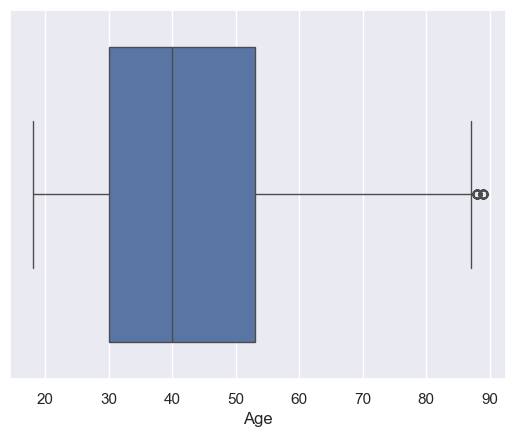

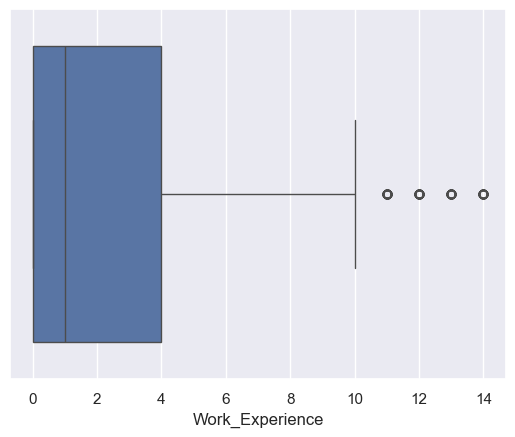

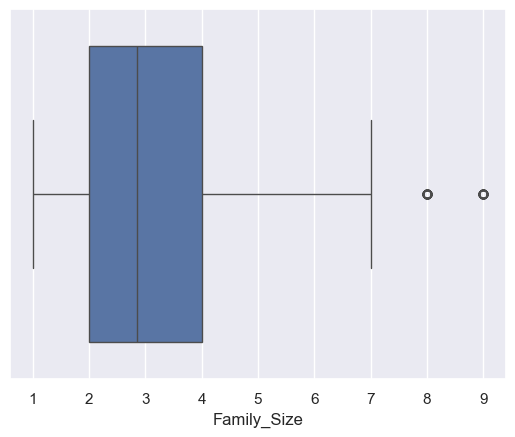

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

for i in data1[['Age',
       'Work_Experience','Family_Size']]:
    sns.boxplot(data=data1,x=data1[i])
    plt.show()

In [16]:
q1 = data1.quantile(0.25,numeric_only=True)
q3 = data1.quantile(0.75,numeric_only=True)
IQR=q3-q1

Lower = q1 - 1.5*IQR
Upper = q3 + 1.5*IQR


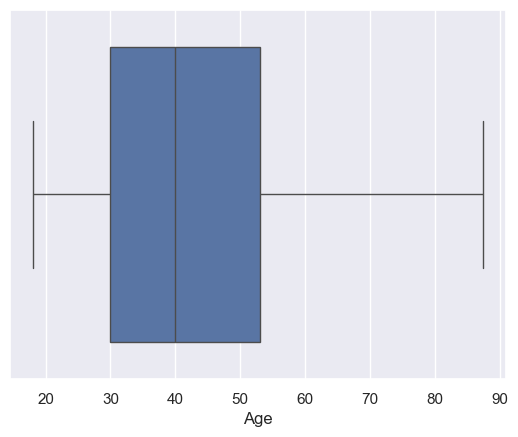

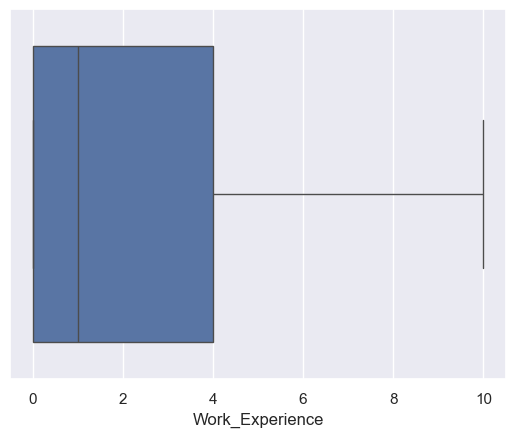

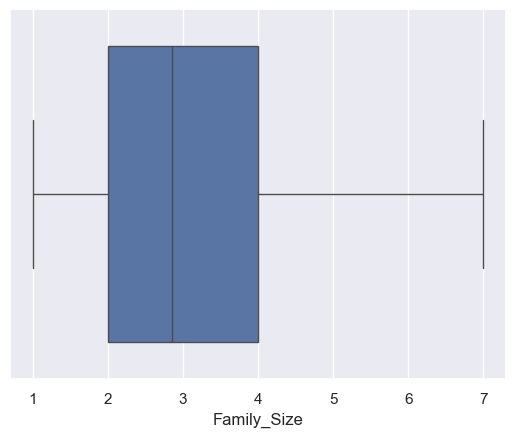

In [19]:
for i in data1[['Age',
       'Work_Experience','Family_Size']]:
    data1[i] = np.where(data1[i]>Upper[i],Upper[i],data1[i])
    data1[i] = np.where(data1[i]<Lower[i],Lower[i],data1[i])
    sns.boxplot(data=data1,x=data1[i])
    plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [21]:
data_new = data1.drop(['Segmentation','ID'],axis=1)
data_new

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22.0,No,Healthcare,1.000000,Low,4.0,Cat_4
1,Female,Yes,38.0,Yes,Engineer,2.641663,Average,3.0,Cat_4
2,Female,Yes,67.0,Yes,Engineer,1.000000,Low,1.0,Cat_6
3,Male,Yes,67.0,Yes,Lawyer,0.000000,High,2.0,Cat_6
4,Female,Yes,40.0,Yes,Entertainment,2.641663,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...
8063,Male,No,22.0,No,Artist,0.000000,Low,7.0,Cat_1
8064,Male,No,35.0,No,Executive,3.000000,Low,4.0,Cat_4
8065,Female,No,33.0,Yes,Healthcare,1.000000,Low,1.0,Cat_6
8066,Female,No,27.0,Yes,Healthcare,1.000000,Low,4.0,Cat_6


In [22]:
data_with_dummies = pd.get_dummies(data_new, drop_first=True).astype(int)

In [23]:
data_with_dummies

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1,4,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,38,2,3,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,67,1,1,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,67,0,2,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,40,2,6,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,0,7,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8064,35,3,4,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
8065,33,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8066,27,1,4,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
data1['Segmentation']=le.fit_transform(data1['Segmentation'])

In [25]:
data1

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22.0,No,Healthcare,1.000000,Low,4.0,Cat_4,3
1,462643,Female,Yes,38.0,Yes,Engineer,2.641663,Average,3.0,Cat_4,0
2,466315,Female,Yes,67.0,Yes,Engineer,1.000000,Low,1.0,Cat_6,1
3,461735,Male,Yes,67.0,Yes,Lawyer,0.000000,High,2.0,Cat_6,1
4,462669,Female,Yes,40.0,Yes,Entertainment,2.641663,High,6.0,Cat_6,0
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22.0,No,Artist,0.000000,Low,7.0,Cat_1,3
8064,464685,Male,No,35.0,No,Executive,3.000000,Low,4.0,Cat_4,3
8065,465406,Female,No,33.0,Yes,Healthcare,1.000000,Low,1.0,Cat_6,3
8066,467299,Female,No,27.0,Yes,Healthcare,1.000000,Low,4.0,Cat_6,1


In [26]:
targets = data1['Segmentation']

inputs = data_with_dummies[data_with_dummies.columns]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=42)

In [28]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns
sns.set()

In [29]:
def evaluate(model, X_test, y_test):
    
    y_pred_test = model.predict(X_test)

    accuracy_test = accuracy_score(y_test, y_pred_test)*100
    
    
    
    y_pred_train = model.predict(X_train)

    accuracy_train = accuracy_score(y_train, y_pred_train)*100

    print('Accuracy for test is', accuracy_test)
    print('Accuracy for train is', accuracy_train)

In [30]:
base_model = svm.SVC()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Accuracy for test is 44.98141263940521
Accuracy for train is 44.94421816893926


In [31]:
from sklearn.model_selection import RandomizedSearchCV

kernel = ['poly', 'rbf', 'sigmoid']

gamma = ['scale', 'auto'] 

C = [1, 10, 100, 1e3, 1e4, 1e5, 1e6]

random_grid = {'kernel': kernel,
               'gamma': gamma,
               'C': C}
print(random_grid)

{'kernel': ['poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'C': [1, 10, 100, 1000.0, 10000.0, 100000.0, 1000000.0]}


In [32]:
svc_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=1, n_jobs = -1)

svc_random.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=1, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000.0, 10000.0,
                                              100000.0, 1000000.0],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['poly', 'rbf', 'sigmoid']},
                   verbose=1)

In [33]:
svc_random.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'C': 100000.0}

In [34]:
optimized_model = svc_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

Accuracy for test is 41.594382486575796
Accuracy for train is 96.52913051177616


In [57]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC

In [58]:


one_vs_one_model = OneVsOneClassifier(base_model)

one_vs_one_model.fit(X_train, y_train)

OneVsOneClassifier(estimator=SVC())

In [59]:
y_scores = one_vs_one_model.decision_function(X_test)

y_scores

array([[ 2.20907813,  0.80944304, -0.25193535,  3.24437584],
       [ 2.19926832,  0.84517429, -0.21837334,  3.18716896],
       [ 1.87705775,  0.77665302, -0.24735922,  3.2819894 ],
       ...,
       [ 2.19016473,  0.80063395, -0.25092921,  3.25406295],
       [ 3.21240384,  2.0775777 ,  0.9221062 , -0.21233304],
       [ 0.85019587,  2.19578587,  3.2504313 , -0.26130759]])

In [60]:
y_binary = np.zeros((len(y_test), len(np.unique(targets))))

for i, label in enumerate(np.unique(targets)):
    y_binary[:, i] = (y_test == label).astype(int)

y_binary

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [61]:
auc_scores=[]

for i in range(len(np.unique(targets))):
    auc = roc_auc_score(y_binary[:, i], y_scores[:, i])
    auc_scores.append(auc)

In [62]:
np.mean(auc_scores)

0.706311799465543

In [63]:
Gini = (np.mean(auc_scores) * 2) - 1
Gini

0.412623598931086

In [64]:
from sklearn.multiclass import OneVsRestClassifier

In [65]:
one_vs_rest_model = OneVsRestClassifier(base_model)

one_vs_rest_model.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [66]:
y_scores = one_vs_rest_model.decision_function(X_test)

y_scores

array([[-1.00007565, -0.99996982, -1.01899776, -0.24243426],
       [-1.00012453, -1.00009888, -1.00219076, -0.56852111],
       [-1.00035068, -1.00012541, -1.00395333,  1.20784358],
       ...,
       [-1.00012108, -0.99999915, -1.00450725, -0.0712684 ],
       [-0.99997193, -1.00000604, -0.99833497, -1.19811697],
       [-0.99990192, -0.99995886, -0.95318104, -1.05493665]])

In [67]:
y_binary = np.zeros((len(y_test), len(np.unique(targets))))

for i, label in enumerate(np.unique(targets)):
    y_binary[:, i] = (y_test == label).astype(int)

y_binary

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [68]:
auc_scores=[]

for i in range(len(np.unique(targets))):
    auc = roc_auc_score(y_binary[:, i], y_scores[:, i])
    auc_scores.append(auc)

In [69]:
np.mean(auc_scores)

0.7066510386485553

In [70]:
Gini = (np.mean(auc_scores) * 2) - 1
Gini

0.41330207729711055

In [72]:
data1['Segmentation'].value_counts()
#balance OVR
#inbalance OVO

Segmentation
3    2268
0    1972
2    1970
1    1858
Name: count, dtype: int64

In [121]:
data2 = pd.read_csv(r'C:\Users\FX517ZM\Desktop\Data Science\Lesson-20\customer_segmentation_test.csv')
data2

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [122]:
data2.describe(include='all')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
count,2627.000000,2627,2577,2627.000000,2603,2589,2358.000000,2627,2514.000000,2595
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6
freq,NaN,1424,1520,NaN,1602,802,NaN,1616,NaN,1672
mean,463433.918919,NaN,NaN,43.649791,NaN,NaN,2.552587,NaN,2.825378,NaN
std,2618.245698,NaN,NaN,16.967015,NaN,NaN,3.341094,NaN,1.551906,NaN
min,458989.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN
25%,461162.500000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN
50%,463379.000000,NaN,NaN,41.000000,NaN,NaN,1.000000,NaN,2.000000,NaN
75%,465696.000000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN


In [123]:
data2.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [124]:
for i in data2[['Ever_Married','Graduated','Profession','Work_Experience','Family_Size','Var_1']]:
    if data2[i].dtype == 'object':
        data2[i].fillna(data2[i].mode()[0], inplace=True)
    else:
        data2[i].fillna(data2[i].mean(), inplace=True)

In [125]:
data2.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [126]:
data2.corr(numeric_only=True)

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.022940,-0.023917,0.020334
Age,-0.022940,1.000000,-0.174566,-0.278527
Work_Experience,-0.023917,-0.174566,1.000000,-0.066554
Family_Size,0.020334,-0.278527,-0.066554,1.000000


In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data2[['Age',
       'Work_Experience','Family_Size']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.635212,Age
1,1.469746,Work_Experience
2,2.606351,Family_Size


In [128]:
data_with_dummies = pd.get_dummies(data2, drop_first=True).astype(int)

In [129]:
data_with_dummies

,ID,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,458989,36,0,1,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,458994,37,8,4,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,458996,69,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,459000,59,11,2,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,459001,19,2,4,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,29,9,4,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2623,467958,35,1,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2624,467960,53,2,2,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2625,467961,47,1,5,1,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [130]:
data_with_dummies.columns

Index(['ID', 'Age', 'Work_Experience', 'Family_Size', 'Gender_Male',
       'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_High',
       'Spending_Score_Low', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4',
       'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7'],
      dtype='object')

In [131]:
pred = one_vs_rest_model.predict(data_with_dummies.iloc[:,1:])

In [132]:
data_with_dummies['PD'] = pred

data_with_dummies



,ID,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,PD
0,458989,36,0,1,0,1,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,458994,37,8,4,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,3
2,458996,69,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,3
3,459000,59,11,2,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,2
4,459001,19,2,4,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,29,9,4,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,3
2623,467958,35,1,1,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,3
2624,467960,53,2,2,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2625,467961,47,1,5,1,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,2
